In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-images.idx3-ubyte
/kaggle/input/t10k-labels.idx1-ubyte
/kaggle/input/t10k-images.idx3-ubyte
/kaggle/input/train-labels.idx1-ubyte
/kaggle/input/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
train_images_path = '/kaggle/input/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = '/kaggle/input/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = '/kaggle/input/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = '/kaggle/input/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [3]:
import keras
import tensorflow as tf
import time
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [4]:
import numpy as np
import struct

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
        return images / 255.0  # Normalize pixel values to [0, 1]

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# Load training and testing data
X_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
X_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)


In [5]:
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
X_train = X_train.astype('float32')  / 255.0
X_test = X_test.astype('float32')  / 255.0

# Create the MLP+CNN Model

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout

# Define the model
model0 = Sequential()

# Convolutional Layer
model0.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Flatten the output from the convolutional layer
model0.add(Flatten())

# Fully connected layer
model0.add(Dense(32, activation='relu'))
model0.add(Dropout(0.3))

# Output layer
model0.add(Dense(10, activation='softmax'))

# Compile the model
model0.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model0.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       173,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,498 (677.73 KB)

 Trainable params: 173,498 (677.73 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [10]:
batch_size  = 32
epochs      = 100

start_time0 = time.time()
history0 = model0.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time0 = time.time()

# Calculate elapsed time
elapsed_time0 = stop_time0 - start_time0
minutes0 = int(elapsed_time0 // 60)
seconds0 = int(elapsed_time0 % 60)

# Print time used in minutes and seconds
print(f'training_time0 = {minutes0} min {seconds0} sec')

Epoch 1/100
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1115 - loss: 2.3018
Epoch 1: val_accuracy improved from -inf to 0.11350, saving model to Best_points.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1115 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/100
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1140 - loss: 2.3011
Epoch 2: val_accuracy did not improve from 0.11350
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1140 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 3/100
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1126 - loss: 2.3014
Epoch 3: val_accuracy did not improve from 0.11350
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1126 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/100
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1124 - loss: 2.3010
Epoch 4: val_accuracy did not improve from 0.11350
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step 

In [11]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('Best_points.keras')

# Evaluate the model on the test dataset
score = best_model.evaluate(X_test, y_test, verbose=0)

# Print the evaluation results
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.2433
Test accuracy : 0.9310


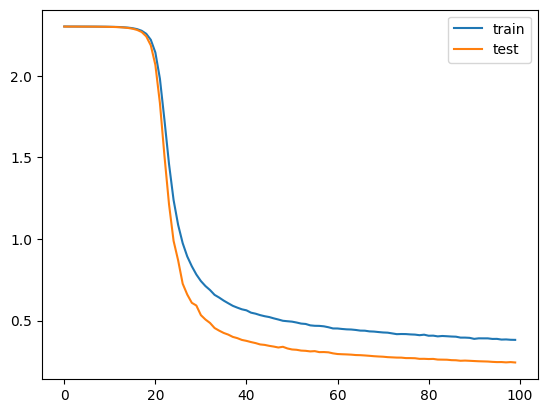

In [12]:
plt.plot(history0.history['loss'], label='train')
plt.plot(history0.history['val_loss'], label='test')
plt.legend()

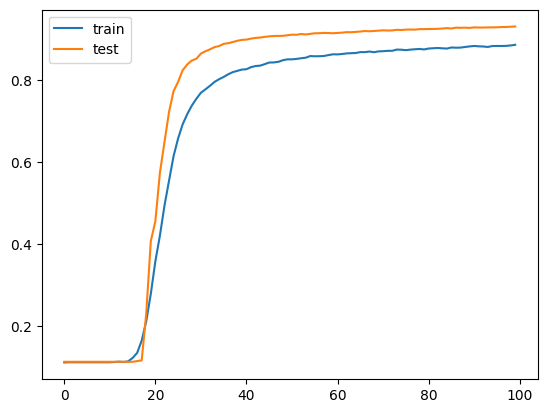

In [13]:
plt.plot(history0.history['accuracy'], label='train')
plt.plot(history0.history['val_accuracy'], label='test')
plt.legend()